# **LSTM**

### Package requirements

In [2]:
!pip install focal-loss

In [ ]:
!pip install plot_keras_history

Load training set

In [3]:
!unzip data_fly.zip

Archive:  data_fly.zip
replace data_fly/CS_170910_avi_ROI1_E02/all_ann.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [3]:
from Load import*
from Train import*
from Utils import*
from Data_augmentation import*
%matplotlib inline
%load_ext autoreload
%autoreload 2

Unzip the model weights for LSTM. The folder should be then moved to a Results folder.

In [9]:
#unzip Results.zip
!unzip opt_LSTM_model.zip
!unzip opt_TCN_model.zip

Archive:  opt_LSTM_model.zip
   creating: opt_LSTM_model/assets/
  inflating: opt_LSTM_model/saved_model.pb  
   creating: opt_LSTM_model/variables/
  inflating: opt_LSTM_model/variables/variables.data-00000-of-00001  
  inflating: opt_LSTM_model/variables/variables.index  
Archive:  opt_TCN_model.zip
   creating: opt_TCN_model/
  inflating: __MACOSX/._opt_TCN_model  
   creating: opt_TCN_model/variables/
  inflating: __MACOSX/opt_TCN_model/._variables  
  inflating: opt_TCN_model/saved_model.pb  
  inflating: __MACOSX/opt_TCN_model/._saved_model.pb  
   creating: opt_TCN_model/assets/
  inflating: __MACOSX/opt_TCN_model/._assets  
  inflating: opt_TCN_model/variables/variables.data-00000-of-00001  
  inflating: __MACOSX/opt_TCN_model/variables/._variables.data-00000-of-00001  
  inflating: opt_TCN_model/variables/variables.index  
  inflating: __MACOSX/opt_TCN_model/variables/._variables.index  


## **Building training / validation / testing data sets**

### Load training data in full length

In [4]:
X, Y = load_training_data()
train, test, val = train_te_val_split(X,Y)

### Load augmented training data (gaussian noise)

In [ ]:
X, Y = load_training_data()
T=2
train, test, val = data_augmentation(X,Y,T)

### Load split data 
(the size T of the split can be tuned)

In [ ]:
X, Y = load_training_data()
train, test, val = data_augmentation_2(X,Y)

### Evaluate on test set
Stack train and validation data to train and evaluate model against test set

In [7]:
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

## **Building a model**

Baseline model example on 5 runs: 
- weighted F1 score : 64.558% (+/-6.591)
- Macro F1 score : 29.105% (+/-5.622)
- Proportional F1 score : 2.672% (+/-0.906)
- Accuracy : 93.031% (+/-1.277)
- Loss : 0.054% (+/-0.009)
- Mean F1 score per label:  [0.03690437 0.67399413 0.22231582 0.56710583 0.         0.
 0.         0.82805901]

Baseline model is 100 nodes, 1 biLSTM layer, dropout = 0. 

Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 64.558% (+/-6.591)
Macro F1 score : 29.105% (+/-5.622)
Proportional F1 score : 2.672% (+/-0.906)
Accuracy : 93.031% (+/-1.277)
Loss : 0.054% (+/-0.009)
Mean F1 score per label:  [0.03690437 0.67399413 0.22231582 0.56710583 0.         0.
 0.         0.82805901]


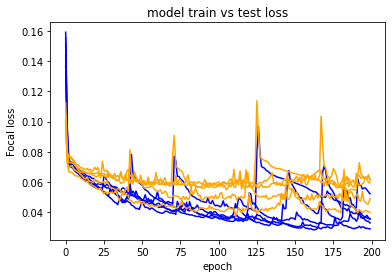

(array([[54.92196679, 18.40759069,  0.93359018],
        [70.00672221, 33.26380551,  3.12683748],
        [73.42842817, 33.00745487,  3.14163729],
        [60.63277721, 28.47505212,  2.67785518],
        [63.80027533, 32.36979544,  3.48173935]]),
 [[0,
   0.5555028215819181,
   0.05136986218181735,
   0.07137858530650817,
   0,
   0,
   0,
   0.7943559872525304],
  [0.12398373791848852,
   0.7532000174684155,
   0.21122995351197965,
   0.7091346068761171,
   0,
   0,
   0,
   0.8635560514844068],
  [0,
   0.7236870326748559,
   0.2571041921351003,
   0.7732634137565529,
   0,
   0,
   0,
   0.8865416704323137],
  [0,
   0.6730835351519486,
   0.2595673882656585,
   0.5687999468832413,
   0,
   0,
   0,
   0.7765534116929947],
  [0.060538118498734014,
   0.6644972654468174,
   0.3323076821997327,
   0.7129525982101039,
   0,
   0,
   0,
   0.8192879118170789]])

In [ ]:
run_exp_hist(X_tr,Y_tr, test[0], test[1], repeats = 5, gamma = 2, node = 100, epochs = 100, CV = True, dropout = 0, m_type = 0)

### Cross validation

* Train and validation loss evolutions are printed for each parameter.
When CV is set to false, the model is trained in X_train, Y_train only. 
* Cross validation was performed looking at weighted and macro F1 scores. For some of the settings, the focal loss was slightly bouncing up, but regularization and early stopping lead to lower F1 scores so we tried to tune the number of epochs accordingly to avoid diverging validation loss.
* The results are stochastic, so you may not obtain exactly the same mean. However, the mean value you get should fall into our range, and the best hyper parameter values should always be the same.

**Cross validation model type**
on 100 nodes, dropout of 0.1 and 200 epochs.
- Model 0 : simple 1 LSTM layer
- Model 1 : 1 bidirectional LSTM layer
- Model 2 : 2 bidirectional LSTM layers

**Model 1** resulted in better performance on weighted F1 score:
 - weighted F1 score : 71.930% (+/-3.241)
 - Macro F1 score : 39.827% (+/-4.467)
 - Proportional F1 score : 4.990% (+/-1.065)
 - Accuracy : 93.777% (+/-0.695)
 - Loss : 0.046% (+/-0.007)
 - Mean F1 score per label:  [0.14348959 0.77832724 0.50319382 0.74715674 0.07093195 0.
 0.10594824 0.83710708]

Model type :  0
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 68.630% (+/-4.115)
Macro F1 score : 33.580% (+/-2.158)
Proportional F1 score : 3.533% (+/-0.366)
Accuracy : 93.531% (+/-1.006)
Loss : 0.053% (+/-0.005)
Mean F1 score per label:  [0.06855711 0.67435744 0.32489815 0.69711134 0.         0.
 0.08402919 0.83740985]


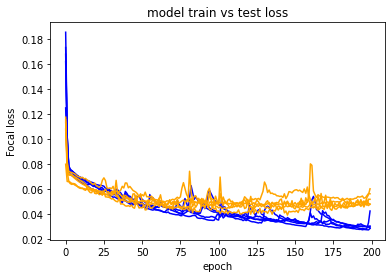

Model type :  1
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 71.930% (+/-3.241)
Macro F1 score : 39.827% (+/-4.467)
Proportional F1 score : 4.990% (+/-1.065)
Accuracy : 93.777% (+/-0.695)
Loss : 0.046% (+/-0.007)
Mean F1 score per label:  [0.14348959 0.77832724 0.50319382 0.74715674 0.07093195 0.
 0.10594824 0.83710708]


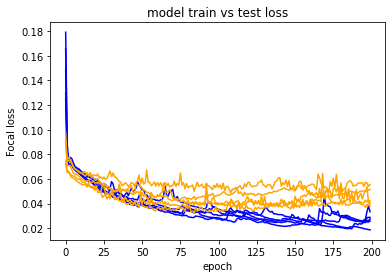

Model type :  2
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 70.767% (+/-5.487)
Macro F1 score : 40.994% (+/-3.448)
Proportional F1 score : 5.377% (+/-0.596)
Accuracy : 93.320% (+/-1.190)
Loss : 0.078% (+/-0.018)
Mean F1 score per label:  [0.16887874 0.72135547 0.53377619 0.77201574 0.09718155 0.
 0.13915586 0.84716696]


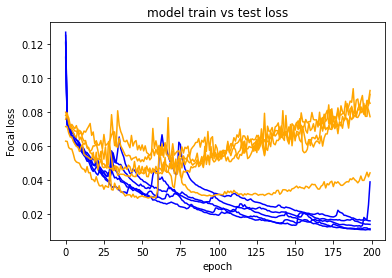

In [ ]:
for m in [0,1,2]:
  print('Model type : ', m)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], dropout = 0.1, node = 100, m_type=m, CV = True)

**Cross validation on dropout** 
Best dropout turns out to be 0.1.

In [ ]:
for d in [0,0.1,0.2,0.3]:
  print('Dropout value : ', d)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 100, m_type=2, dropout = d, epochs = 100, CV = True)

**Cross validation number of nodes** and model type
(average on 5 repeats -> 5 fold cross validation)
> Best result for model 1 (best model) in range [100-500]:
- 400 nodes : 
 - weighted F1 score : 75.057% (+/-3.116)
 - Macro F1 score : 43.892% (+/-1.862)
 - Proportional F1 score : 5.764% (+/-0.547)
 - Accuracy : 94.608% (+/-0.819)
 - Loss : 0.048% (+/-0.007)
 - Mean F1 score per label:  [0.19772498 0.77225354 0.59392612 0.80992765 0.08420977 0.
 0.17682172 0.87652331]

> Best result model 1 (best model) in range [800-1000]
- 600 nodes:
 - weighted F1 score : 75.473% (+/-2.943)
 - Macro F1 score : 43.569% (+/-2.345)
 - Proportional F1 score : 5.642% (+/-0.444)
 - Accuracy : 94.647% (+/-0.519)
 - Loss : 0.043% (+/-0.006)
 - Mean F1 score per label:  [0.24069872 0.77573205 0.59402466 0.79996719 0.05666204 0.
 0.13801333 0.88041566]

 **So possible values can be 400 (500) 600 nodes on model 1.**

Node number:  100
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 69.714% (+/-2.250)
Macro F1 score : 40.787% (+/-2.094)
Proportional F1 score : 5.381% (+/-0.527)
Accuracy : 93.186% (+/-0.427)
Loss : 0.059% (+/-0.008)
Mean F1 score per label:  [0.12405505 0.75518992 0.57887123 0.81232893 0.08528261 0.
 0.08206868 0.82512647]


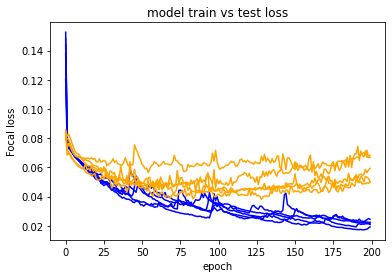

Node number:  200
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 71.676% (+/-1.645)
Macro F1 score : 39.829% (+/-3.663)
Proportional F1 score : 4.903% (+/-0.804)
Accuracy : 94.087% (+/-0.289)
Loss : 0.050% (+/-0.006)
Mean F1 score per label:  [0.12405171 0.74367632 0.50786965 0.79236831 0.04165318 0.
 0.11191529 0.86478214]


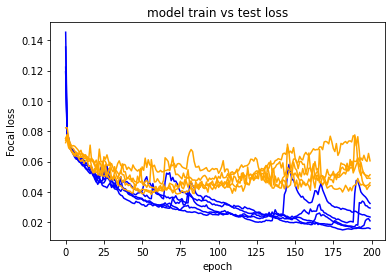

Node number:  300
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 70.169% (+/-3.234)
Macro F1 score : 38.140% (+/-5.146)
Proportional F1 score : 4.554% (+/-1.152)
Accuracy : 93.707% (+/-0.637)
Loss : 0.056% (+/-0.007)
Mean F1 score per label:  [0.13473231 0.72062393 0.43808046 0.78429348 0.02502122 0.
 0.10779944 0.84067804]


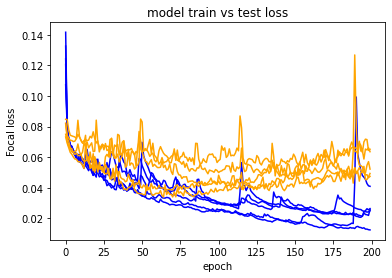

Node number:  400
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 75.057% (+/-3.116)
Macro F1 score : 43.892% (+/-1.862)
Proportional F1 score : 5.764% (+/-0.547)
Accuracy : 94.608% (+/-0.819)
Loss : 0.048% (+/-0.007)
Mean F1 score per label:  [0.19772498 0.77225354 0.59392612 0.80992765 0.08420977 0.
 0.17682172 0.87652331]


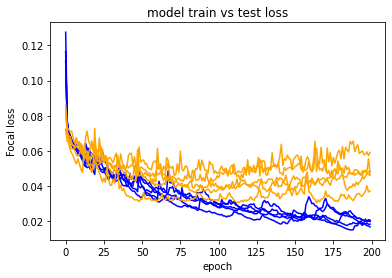

Node number:  500
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 75.010% (+/-4.247)
Macro F1 score : 43.881% (+/-2.116)
Proportional F1 score : 5.827% (+/-0.379)
Accuracy : 94.423% (+/-0.844)
Loss : 0.050% (+/-0.012)
Mean F1 score per label:  [0.20325964 0.7686361  0.59004469 0.82055126 0.10232643 0.
 0.1558848  0.86977782]


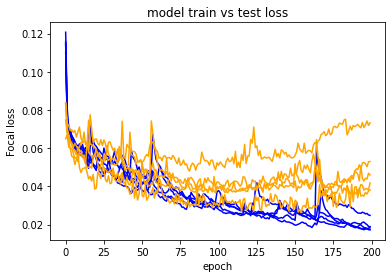

In [ ]:
for node in [100,200,300,400,500]:
  print('Node number: ', node)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = node, m_type=1)

Node number:  600
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 75.473% (+/-2.943)
Macro F1 score : 43.569% (+/-2.345)
Proportional F1 score : 5.642% (+/-0.444)
Accuracy : 94.647% (+/-0.519)
Loss : 0.043% (+/-0.006)
Mean F1 score per label:  [0.24069872 0.77573205 0.59402466 0.79996719 0.05666204 0.
 0.13801333 0.88041566]


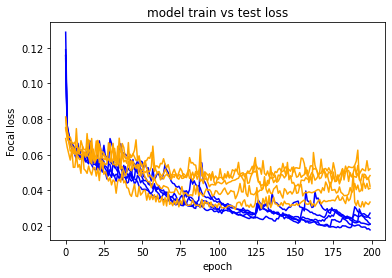

Node number:  800
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 74.836% (+/-2.440)
Macro F1 score : 42.064% (+/-1.112)
Proportional F1 score : 5.228% (+/-0.137)
Accuracy : 94.759% (+/-0.563)
Loss : 0.042% (+/-0.006)
Mean F1 score per label:  [0.24546767 0.79345502 0.53661399 0.80146576 0.03295142 0.
 0.07038194 0.88482323]


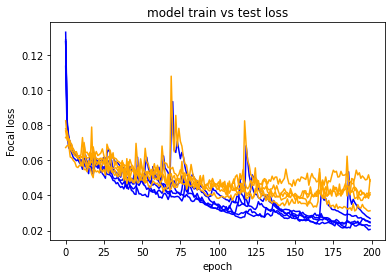

Node number:  1000
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 73.914% (+/-2.529)
Macro F1 score : 38.884% (+/-2.423)
Proportional F1 score : 4.635% (+/-0.552)
Accuracy : 94.745% (+/-0.547)
Loss : 0.047% (+/-0.009)
Mean F1 score per label:  [0.15547109 0.7389098  0.44723922 0.79013991 0.05499549 0.
 0.04224542 0.88169929]


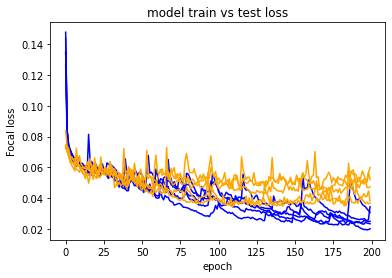

In [ ]:
for node in [600, 800, 1000]:
  print('Node number: ', node)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], repeats = 5, node = node, epochs = 100,  m_type=1, CV = True )

**Best node for best model selection**

In [ ]:
run_exp_hist(X_tr,Y_tr, test[0], test[1], repeats = 5, gamma = 2, node = 600, epochs = 100, CV = True, dropout = 0, m_type = 1, reg = 1e-6)

In [ ]:
run_exp_hist(X_tr,Y_tr, test[0], test[1], repeats = 5, gamma = 2, node = 600, epochs = 100, CV = True, dropout = 0, m_type = 2, reg = 1e-6)

**Cross validation regularization**
1e-6 performed better

reg:  0
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 73.585% (+/-4.674)
Macro F1 score : 40.365% (+/-3.432)
Proportional F1 score : 4.989% (+/-0.639)
Accuracy : 94.455% (+/-0.989)
Loss : 0.052% (+/-0.007)
Mean F1 score per label:  [0.11728253 0.75747969 0.57123505 0.75882442 0.02192606 0.
 0.12500254 0.87745586]


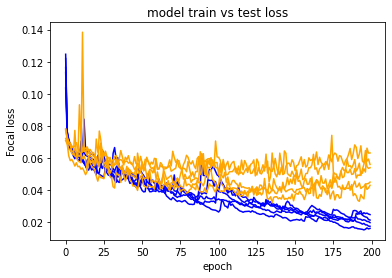

reg:  1e-07
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 71.705% (+/-3.283)
Macro F1 score : 39.195% (+/-4.292)
Proportional F1 score : 5.032% (+/-1.021)
Accuracy : 94.062% (+/-0.552)
Loss : 0.052% (+/-0.006)
Mean F1 score per label:  [0.09932726 0.6927463  0.53058571 0.76973867 0.08382847 0.
 0.09801364 0.86132824]


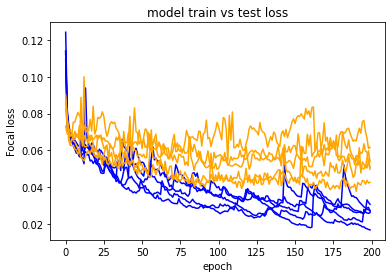

reg:  1e-06
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 76.217% (+/-1.690)
Macro F1 score : 43.055% (+/-1.700)
Proportional F1 score : 5.447% (+/-0.317)
Accuracy : 94.993% (+/-0.597)
Loss : 0.044% (+/-0.005)
Mean F1 score per label:  [0.15874513 0.81564901 0.62185817 0.81990094 0.03108064 0.
 0.11580459 0.8813905 ]


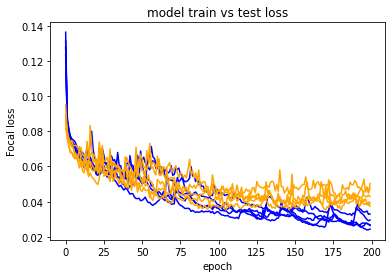

In [ ]:
for reg in[0,1e-7,1e-6]:
  print("reg: ", reg)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 600, m_type=1, dropout = 0.1, epochs = 100, reg = reg, CV = True)

reg:  1e-05
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 69.350% (+/-6.907)
Macro F1 score : 36.785% (+/-3.024)
Proportional F1 score : 4.302% (+/-0.499)
Accuracy : 94.119% (+/-1.355)
Loss : 0.053% (+/-0.009)
Mean F1 score per label:  [4.41163680e-02 7.76348155e-01 5.12567256e-01 7.70838652e-01
 0.00000000e+00 0.00000000e+00 2.45549404e-04 8.38709044e-01]


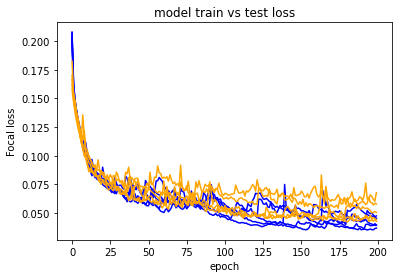

reg:  0.0001
Cross validation


KeyboardInterrupt: ignored

In [ ]:
for reg in[1e-5, 1e-4]:
  print("reg: ", reg)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 600, m_type=1, dropout = 0.1, epochs = 100, reg = reg, CV = True)

**Cross validation on data structure**
> The loss is not regularized here, and it leads to very poor results on "full length" validation set.

> Augmented data didn't induce a major improvements in the metrics.

In [ ]:
for T in [4,7,9]:
  X, Y = load_training_data()
  train, test, val = data_augmentation(X,Y,T)
  print('Split : ', T)
  run_exp_hist(train[0],train[1], val[0], val[1], node = 100, m_type=2, dropout = 0.1, epochs = 200, CV = False)

In [ ]:
X, Y = load_training_data()
train, test, val = data_augmentation_2(X,Y)
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1])) 
run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 100, m_type=2, dropout=0.1, epochs = 100, CV = True)


**Epochs tuning** looking at loss curve.

epochs:  50
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 68.348% (+/-3.699)
Macro F1 score : 36.400% (+/-3.240)
Proportional F1 score : 4.313% (+/-0.642)
Accuracy : 93.205% (+/-0.749)
Loss : 0.060% (+/-0.005)
Mean F1 score per label:  [0.13648626 0.63862083 0.43185636 0.76169444 0.01948536 0.
 0.08923928 0.83463073]


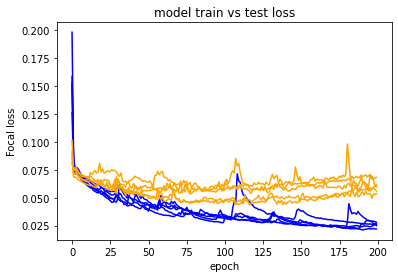

epochs:  100
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 69.228% (+/-3.985)
Macro F1 score : 38.041% (+/-3.947)
Proportional F1 score : 4.510% (+/-0.752)
Accuracy : 93.592% (+/-0.718)
Loss : 0.054% (+/-0.011)
Mean F1 score per label:  [0.12767715 0.73488296 0.43314958 0.74602317 0.0581202  0.
 0.09084077 0.85260122]


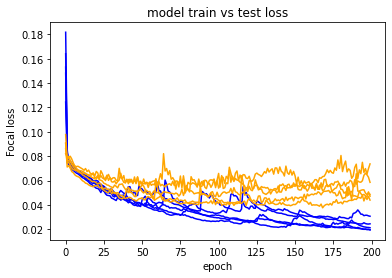

epochs:  150
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 69.004% (+/-4.775)
Macro F1 score : 35.629% (+/-3.614)
Proportional F1 score : 3.900% (+/-0.756)
Accuracy : 93.624% (+/-1.068)
Loss : 0.053% (+/-0.011)
Mean F1 score per label:  [0.12034932 0.69045315 0.32068672 0.71552369 0.01777652 0.
 0.13465035 0.85084674]


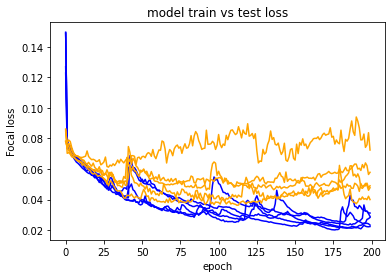

epochs:  200
Cross validation
Cross validation
Cross validation
Cross validation
Cross validation
weighted F1 score : 71.878% (+/-2.912)
Macro F1 score : 38.563% (+/-2.269)
Proportional F1 score : 4.461% (+/-0.579)
Accuracy : 94.160% (+/-0.694)
Loss : 0.049% (+/-0.009)
Mean F1 score per label:  [0.21853144 0.75645367 0.42059441 0.70143708 0.02093962 0.
 0.09854047 0.86851698]


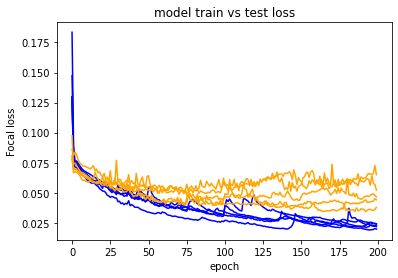

In [8]:
for e in [50,100, 150,200]:
  print("epochs: ", e)
  run_exp_hist(X_tr,Y_tr, test[0], test[1], node = 100, m_type=1, reg = 1e-6, dropout = 0.1, epochs = e, CV = True)

## **Evaluating on test set**

Stack train and validation sets to build final train set:

In [ ]:
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

**NOTE** : CV must be set to False here to make predictions on test set ! LSTM is by default set to true. 

Training versus test
weighted F1 score : 68.255% (+/-0.967)
Macro F1 score : 39.564% (+/-1.772)
Proportional F1 score : 4.858% (+/-0.393)
Accuracy : 93.211% (+/-0.317)
Loss : 0.056% (+/-0.006)
Mean F1 score per label:  [0.18893    0.72220945 0.51379891 0.73605581 0.02265436 0.
 0.13400416 0.84750412]


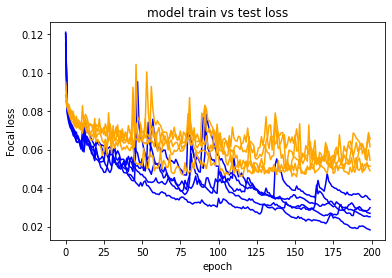

(array([[69.79908943, 40.65839648,  4.99771477],
        [67.32556224, 37.48986423,  4.43167711],
        [67.12591648, 37.32919097,  4.35361969],
        [68.41773391, 41.29508138,  5.31171643],
        [68.60732436, 41.0497725 ,  5.19357077]]),
 [[0.14457832051634625,
   0.7259395391961326,
   0.5003909129152976,
   0.7759562715526965,
   0.048367592867464566,
   0,
   0.19309777324226574,
   0.8643413697274013],
  [0.16511482865521349,
   0.7194919200218317,
   0.5007564416150299,
   0.7592656219933519,
   0,
   0,
   0,
   0.8545602113916472],
  [0.17391304641313263,
   0.693666255080374,
   0.44100895543521074,
   0.6621276663643356,
   0.002677376203608196,
   0,
   0.167004458964102,
   0.8459372926686805],
  [0.2687927003860368,
   0.7500772793240851,
   0.5716188703870858,
   0.7730369364726044,
   0.03680981523892413,
   0,
   0.06715328636997991,
   0.8361177006660215],
  [0.1922511039212647,
   0.7218722358026063,
   0.5552193523944375,
   0.7098925636157628,
   0.025416997

In [ ]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats = 5, gamma = 2, node=600, dropout = 0.1, m_type=1, epochs = 200, reg = 1e-6, LSTM = True, CV = False)

Training versus test
weighted F1 score : 68.091% (+/-1.923)
Macro F1 score : 38.554% (+/-2.680)
Proportional F1 score : 4.638% (+/-0.547)
Accuracy : 93.311% (+/-0.348)
Loss : 0.058% (+/-0.005)
Mean F1 score per label:  [0.17642253 0.69965634 0.41579109 0.73299089 0.06849294 0.
 0.13426369 0.85671906]


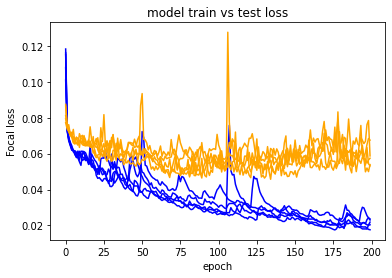

(array([[68.86988878, 40.4132545 ,  5.14187438],
        [64.80219364, 34.46886539,  3.82924147],
        [70.69628239, 42.27078557,  5.3254848 ],
        [68.41920018, 38.45418096,  4.5948086 ],
        [67.66825914, 37.16394901,  4.29809354]]),
 [[0.23919915270043907,
   0.7202344477963255,
   0.4715316495591035,
   0.7401979120939205,
   0.10243901935717958,
   0,
   0.1024042782357773,
   0.857054067185285],
  [0.16949152084455515,
   0.6751268917091967,
   0.29655172918368355,
   0.6547334641409547,
   0.058052436690618936,
   0,
   0.07002398441572348,
   0.8335290988247813],
  [0.20238773116432474,
   0.703528316122912,
   0.41201002042348317,
   0.783526904693575,
   0.12234707030272825,
   0,
   0.29156544437423887,
   0.8662973812468308],
  [0.1417128809775793,
   0.6831800818855739,
   0.4665161707612554,
   0.7334326553320971,
   0.029220779875406784,
   0,
   0.15682967744906437,
   0.865442193150581],
  [0.12932137495100987,
   0.7162119677015967,
   0.4323458708880008,
 

In [ ]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats = 5, gamma = 2, node=600, dropout = 0.1, m_type=1, epochs = 200, reg = 0, LSTM = True, CV = False)

**Build and save the weights for optimal model**
> Single run on test set on best model architecture. To ensure reproducibility, the seeds are fixed in this run.

Training versus test
weighted F1 score : 67.378% (+/-2.903)
Macro F1 score : 38.057% (+/-3.455)
Proportional F1 score : 4.547% (+/-0.626)
Accuracy : 93.072% (+/-0.558)
Loss : 0.061% (+/-0.005)
Mean F1 score per label:  [0.180189   0.68209236 0.45415333 0.73532546 0.02294763 0.
 0.11981748 0.85001778]


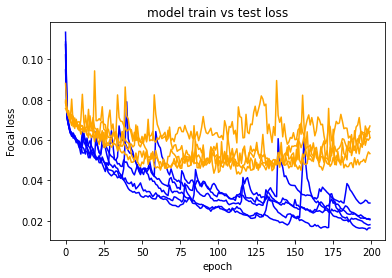

(array([[68.95509362, 38.53465915,  4.56388919],
        [66.81252122, 37.76795864,  4.45805161],
        [68.08053255, 38.67188692,  4.63676474],
        [70.84237337, 43.07071269,  5.52305862],
        [62.19781637, 32.23872483,  3.55102696]]),
 [[0.21493212217104837,
   0.6915306724721779,
   0.47247706476701506,
   0.7276720288715766,
   0,
   0,
   0.10095497997711071,
   0.8752059916180254],
  [0.07437457741787533,
   0.7402558528970055,
   0.5169366885652799,
   0.7882899054107712,
   0.0032336298979615857,
   0,
   0.06309751872261898,
   0.8352484003835695],
  [0.16164053308521364,
   0.658775231780913,
   0.44855305092541925,
   0.7654140507589604,
   0.02898550618721099,
   0,
   0.17108639367847794,
   0.8592961134655515],
  [0.31772265642985326,
   0.6769989865266598,
   0.4528606153173014,
   0.7845342351681575,
   0.08251900279075428,
   0,
   0.2639485031912806,
   0.8670727926796346],
  [0.13227512707629735,
   0.6429010481863625,
   0.37993922226621124,
   0.610717086

In [ ]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats = 5, gamma = 2, node=600, dropout = 0.1, m_type=1, epochs = 200, reg = 0, LSTM = True, CV = False)

Training versus test
weighted F1 score : 67.560% (+/-0.884)
Macro F1 score : 37.536% (+/-1.362)
Proportional F1 score : 4.162% (+/-0.340)
Accuracy : 93.111% (+/-0.323)
Loss : 0.061% (+/-0.002)
Mean F1 score per label:  [0.06672316 0.7992922  0.41119455 0.79473264 0.01271186 0.
 0.10196148 0.8162944 ]


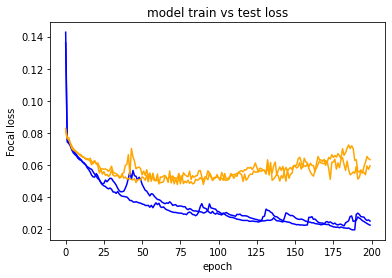

(array([[66.67695045, 36.17429137,  3.82220221],
        [68.44404936, 38.89846504,  4.50245439]]),
 [[0.039829303839608074,
   0.7876752557664767,
   0.3576240060510696,
   0.7969064793424738,
   0,
   0,
   0.10109519750300927,
   0.8108130015039754],
  [0.09361701903466849,
   0.81090913889822,
   0.46476509112979325,
   0.7925587984128363,
   0.025423728680054603,
   0,
   0.10282776340685552,
   0.8217757927438626]])

In [15]:
run_exp_hist(X_tr, Y_tr, test[0], test[1], repeats = 2, gamma = 2, node=100, dropout = 0.1, m_type=1, epochs = 200, reg = 0, LSTM = True, CV = False)

**Building predictions**
> The use should either download the optimal weights from the Github repository, or run the above cell to train the model on best architecture.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 720, 1200)         3244800   
_________________________________________________________________
dropout (Dropout)            (None, 720, 1200)         0         
_________________________________________________________________
dense (Dense)                (None, 720, 8)            9608      
Total params: 3,254,408
Trainable params: 3,254,408
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 2ms/step - loss: 0.0639 - binary_accuracy: 0.9409 - precision: 0.7908 - recall: 0.7323 - false_negatives: 5729.0000 - false_positives: 4146.0000
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlo

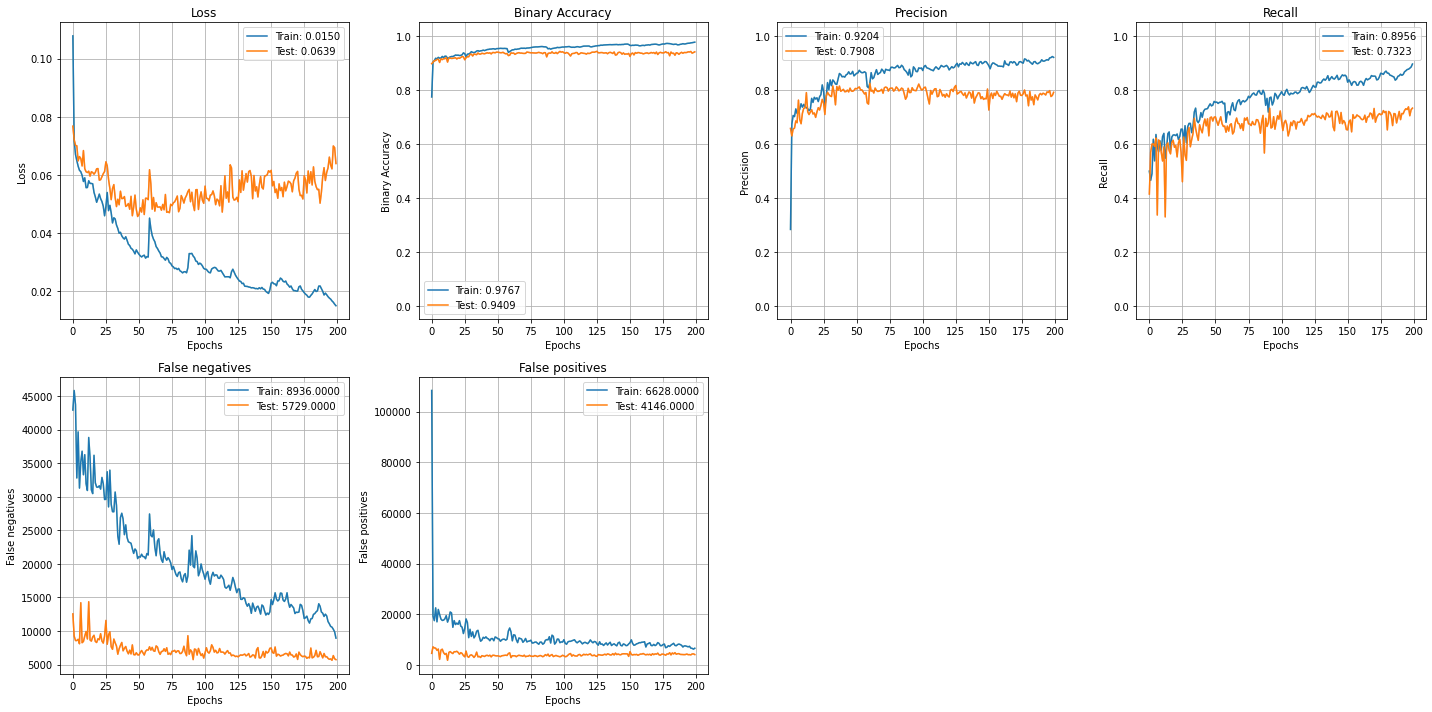

In [8]:
hist, loss, accuracy, wf1, wf1_, mf1, F1_tab, Ptab, Rtab = evaluate_model(X_tr, Y_tr, test[0], test[1], model_type = 1, nodes_nb = 600, epochs = 200, reg = 1e-6, drop = 0.1, verbose = 1, plot = 1, single_run = 1)

In [19]:
predict(test[0], test[1],"LSTM")

Loaded model from disk
1/1 [==============================] - 0s 8ms/step - loss: 0.0294 - binary_accuracy: 0.9638 - precision_10: 0.8809 - recall_10: 0.8298 - false_negatives_21: 3642.0000 - false_positives_21: 2400.0000
F1 score per label:  [0.4826803077940112, 0.8844431885326376, 0.787125103359623, 0.8993561213750445, 0.5547290146432645, 0, 0.39208790152450357, 0.9248006405207763]
Precision per label:  [0.8300781, 0.88345444, 0.8776509, 0.8446849, 0.9490909, 0.0, 0.6299435, 0.89913166]
Recall per label:  [0.34027222, 0.88543415, 0.71352786, 0.9615942, 0.3918919, 0.0, 0.28462029, 0.9519783]
Macro F1 score:  0.6156528  ; Weighted F1 score:  0.83398163  ; Proportional F1 score:  0.09754160308133576
True Positive  number for label  0  : 425.0
True Positive  number for label  1  : 3161.0
True Positive  number for label  2  : 538.0
True Positive  number for label  3  : 1327.0
True Positive  number for label  4  : 261.0
True Positive  number for label  5  : 0.0
True Positive  number for la

In [20]:
from google.colab import files
#files.download('Results/LSTM_Annotation.csv')
! zip -r Results.zip Results/opt_LSTM_model
files.download("Results.zip")

updating: Results/opt_LSTM_model/ (stored 0%)
updating: Results/opt_LSTM_model/assets/ (stored 0%)
updating: Results/opt_LSTM_model/saved_model.pb (deflated 90%)
updating: Results/opt_LSTM_model/variables/ (stored 0%)
updating: Results/opt_LSTM_model/variables/variables.index (deflated 66%)
updating: Results/opt_LSTM_model/variables/variables.data-00000-of-00001 (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Google colab bash

In [ ]:
!bash 

**The following cells must be run separately from the cell above, with the model weights already loaded**
Predictions on a longer video (test with or without splitting into shorter time frames).


In [ ]:
!pip install focal-loss
!pip install plot_keras_history
!unzip data_fly.zip
from Load import*
from Train import*
from Utils import*
from Data_augmentation import*
%matplotlib inline
%load_ext autoreload
%autoreload 2
X, Y = load_training_data()
train, test, val = train_te_val_split(X,Y)
X_tr = np.vstack((train[0], val[0]))
Y_tr = np.vstack((train[1], val[1]))

Data set shape: (Y, X) (1, 36000, 8) (1, 36000, 75)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, None, 1200)        3244800   
_________________________________________________________________
dropout (Dropout)            (None, None, 1200)        0         
_________________________________________________________________
dense (Dense)                (None, None, 8)           9608      
Total params: 3,254,408
Trainable params: 3,254,408
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 3ms/step - loss: 0.0541 - binary_accuracy: 0.9714 - precision: 0.8919 - recall: 0.8803 - false_negatives: 4357.0000 - false_positives: 3885.0000
 -> Accuracy:  0.9713819622993469 ; Mean of labelwise accuracy:  0.9713819
Per label accuracy:  [0.9738333, 0.96319443, 0.9969722, 0.9932

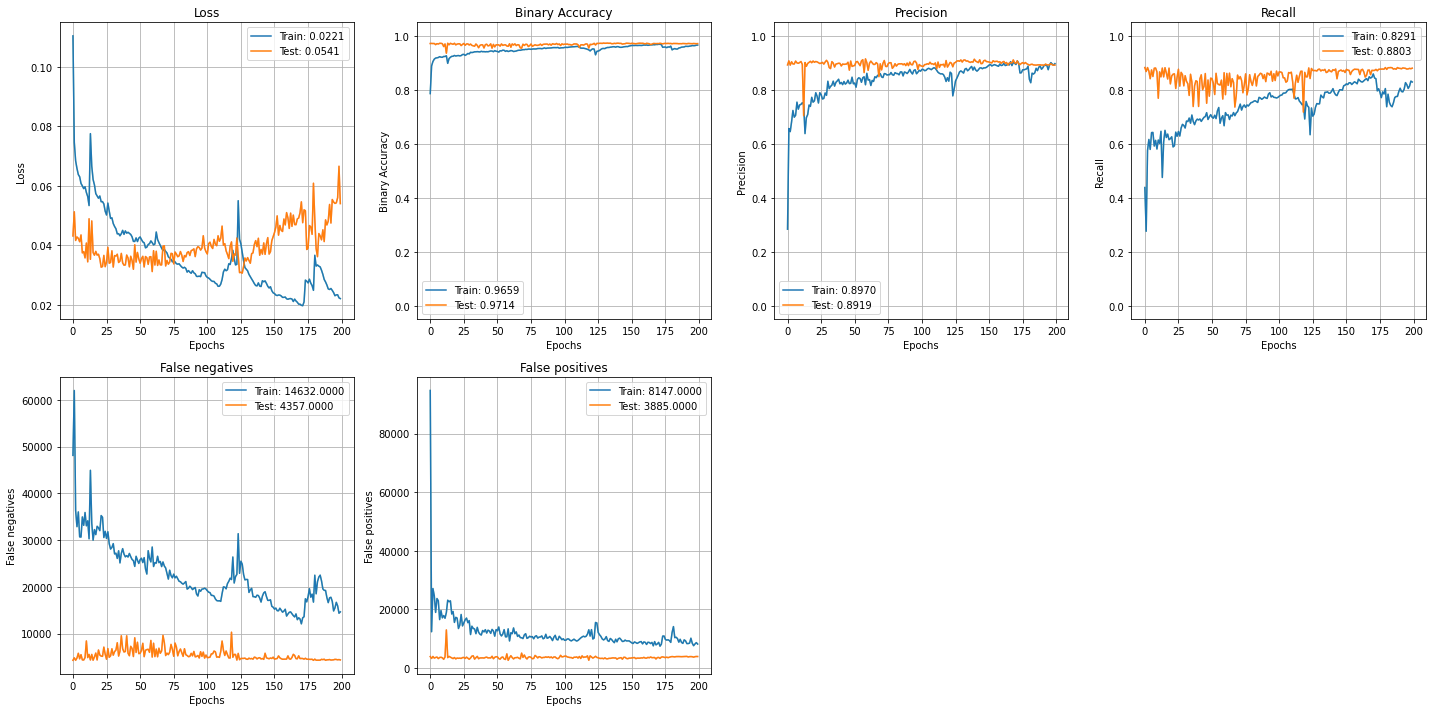

In [32]:
from Data_augmentation import window_splitting
split = False
X,Y = load_test_data('ROI5_t4')
if split:
  X,Y = window_splitting(X,Y,50)
  print("split size:", X.shape, Y.shape)
hist, loss, accuracy, wf1, wf1_, mf1, F1_tab, Ptab, Rtab = evaluate_model(X_tr, Y_tr, X, Y, model_type = 1, nodes_nb = 600, epochs = 200, reg = 1e-6, drop = 0.1, verbose = 1, plot = 1, single_run = 0)

In [21]:
X,Y = load_test_data('ROI5_t4')
predict(X,Y,'LSTM')

Data set shape: (Y, X) (1, 36000, 8) (1, 36000, 75)
Loaded model from disk
1/1 [==============================] - 0s 7ms/step - loss: 0.0620 - binary_accuracy: 0.9707 - precision_12: 0.8910 - recall_12: 0.8757 - false_negatives_30: 4525.0000 - false_positives_30: 3901.0000
F1 score per label:  [0, 0, 0, 0, 0.00390625, 0, 0, 0.9426044982195553]
Precision per label:  [0.0, 0.0, 0.0, 0.0, 0.125, 0.0, 0.0, 0.8978172]
Recall per label:  [0.0, 0.0, 0.0, 0.0, 0.001984127, 0.0, 0.0, 0.9920949]
Macro F1 score:  0.11831384  ; Weighted F1 score:  0.83204114  ; Proportional F1 score:  0.002097015089645203
True Positive  number for label  0  : 0.0
True Positive  number for label  1  : 0.0
True Positive  number for label  2  : 0.0
True Positive  number for label  3  : 0.0
True Positive  number for label  4  : 1.0
True Positive  number for label  5  : 0.0
True Positive  number for label  6  : 0.0
True Positive  number for label  7  : 31877.0
True Negative  number for label  0  : 34951.0
True Negative

Compute the number of occurrences of the labels in the ground truth test set

In [7]:
X,Y = load_test_data('ROI5_t4')
counts= get_labels_prop(Y, count = True)
print(counts)
counts_pred = get_labels_prop(y_pred, count = True)

Data set shape: (Y, X) (1, 36000, 8) (1, 36000, 75)
[  950.  1307.   117.   250.   512.   151.  1041. 32139.]
